<ipython-input-40-61436008cc94>:35: RuntimeWarning: invalid value encountered in true_divide
  vel_x = np.sum(f*c_x,axis=2)/rho
<ipython-input-40-61436008cc94>:36: RuntimeWarning: invalid value encountered in true_divide
  vel_y = np.sum(f*c_y,axis=2)/rho


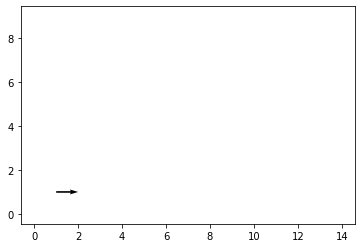

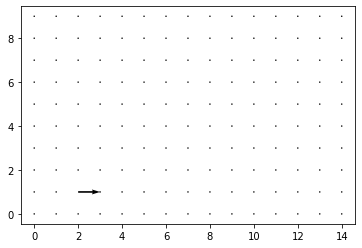

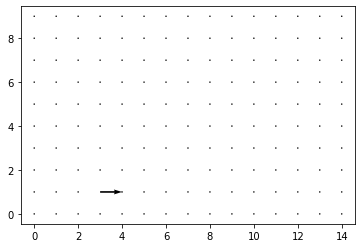

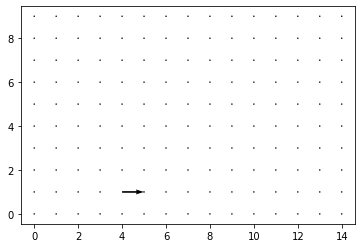

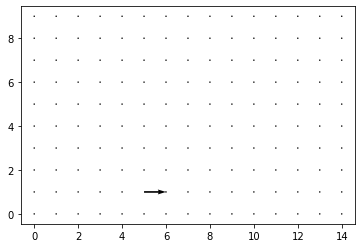

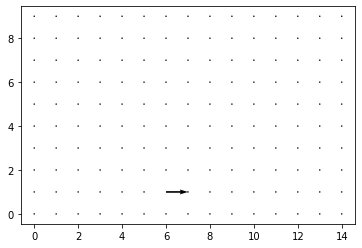

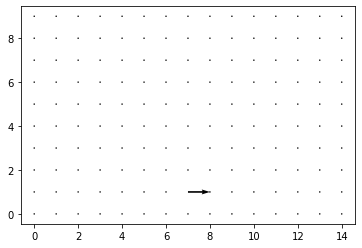

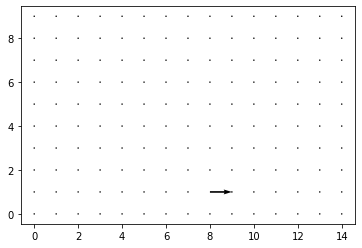

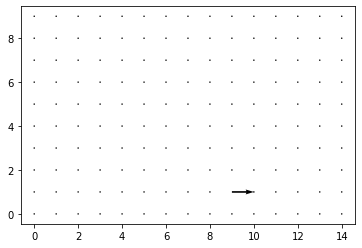

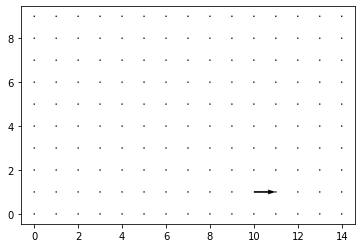

In [40]:
import numpy as np
import matplotlib.pyplot as plt

'''
Here we try to implement streaming operator of Lattice Boltzmann Equation (LBE)
given
    2D9Q ; 2-Dimension & 9 Channels for velocity
    Nx:15, Ny:10 ; 15x10 grid size
    Periodic boundary condition
    delx = delt = 1
    collision operator is absent

'''
# parameter setup
c_x = np.array([0,1,0,-1,0,1,-1,-1,1])
c_y = np.array([0,0,1,0,-1,1,1,-1,-1])
Nx = 15
Ny = 10
NC = 9 # number of channels
weights = np.array([4/9,1/9,1/36,1/9,1/36,1/9,1/36,1/9,1/36]) # weights for each channel
t = 5

# Probability function setup
grid_size = (Ny,Nx,NC)
#f = np.ones(grid_size) # distribution fuction
f = np.zeros(grid_size)
np.random.seed(10)
#f += np.random.randn(Ny,Nx,NC)
f[1,1,1]=1

X,Y = np.meshgrid(range(Nx),range(Ny))

rho = np.sum(f,axis=2)

vel_x = np.sum(f*c_x,axis=2)/rho
vel_y = np.sum(f*c_y,axis=2)/rho
#vel_x = np.divide(np.sum(f*c_x,2),rho, out=np.zeros_like(np.sum(f*c_x,2)), where=rho!=0)
#vel_y = np.divide(np.sum(f*c_y,2),rho, out=np.zeros_like(np.sum(f*c_y,2)), where=rho!=0)

t=10

def streaming(var):
    var[:,:,1]=np.roll(var[:,:,1],(0,1),axis=(0,1))
    var[:,:,2]=np.roll(var[:,:,2],(1,0),axis=(0,1))
    var[:,:,3]=np.roll(var[:,:,3],(0,-1),axis=(0,1))
    var[:,:,4]=np.roll(var[:,:,4],(-1,0),axis=(0,1))
    var[:,:,5]=np.roll(var[:,:,5],(1,1),axis=(0,1))
    var[:,:,6]=np.roll(var[:,:,6],(-1,1),axis=(0,1))
    var[:,:,7]=np.roll(var[:,:,7],(-1,-1),axis=(0,1))
    var[:,:,8]=np.roll(var[:,:,8],(1,-1),axis=(0,1))
    return var

for i in range(t):
    plt.subplots()
    #plt.streamplot(x=X, y=Y, u=vel_x, v=vel_y)
    plt.axis('equal')
    plt.quiver(X, Y, vel_x, vel_y, scale=1, units='xy')
    plt.show()
    f=streaming(f)
    vel_x = np.sum(f*c_x,axis=2)
    vel_y = np.sum(f*c_y,axis=2)
    #print(vel_x)

#for i,cx,cy in zip(range(NC),c_x,c_y):
#    f[:,:,i]=np.roll(f[:,:,i], c_x, axis=0)
#    f[:,:,i]=np.roll(f[:,:,i], c_y, axis=1)
    # print(i,"-th\n")
    # print(f[:,:,i])